#       Human Activity Recognition Project

In this project, we design a robust activity recognition system based on a smartphone. The system uses a 3-dimensional smartphone accelerometer and a gyroscope as the sensors to collect time-series signals, from which 31 features are generated in both time and frequency domain.

In [2]:
#importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
print("Imported data:")
train.head()

Imported data:


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [5]:
print(train.shape)
print(test.shape)

(7352, 564)
(2947, 564)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAccmeanX to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [6]:
train.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


In [7]:
train['ActivityName'].value_counts(normalize=True)

LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: ActivityName, dtype: float64

In [8]:
#descriprytion about the categorical feature
train.describe(include=object)

,ActivityName
count,7352
unique,6
top,LAYING
freq,1407


# Pre-processing

In [9]:
#to know the null values
train.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
ActivityName         0
Length: 564, dtype: int64

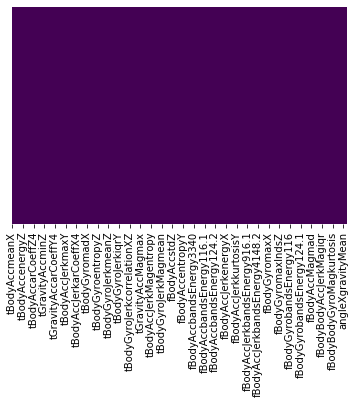

In [10]:
#visualising the missing data using a heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see that there is no null value, therefore, we can proceed with the trainig of the data.

# Exploratory Data Analysis

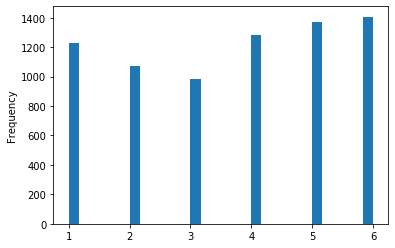

In [12]:
train['Activity'].plot.hist(bins=30)

**Countplot for Activity name vs subject**

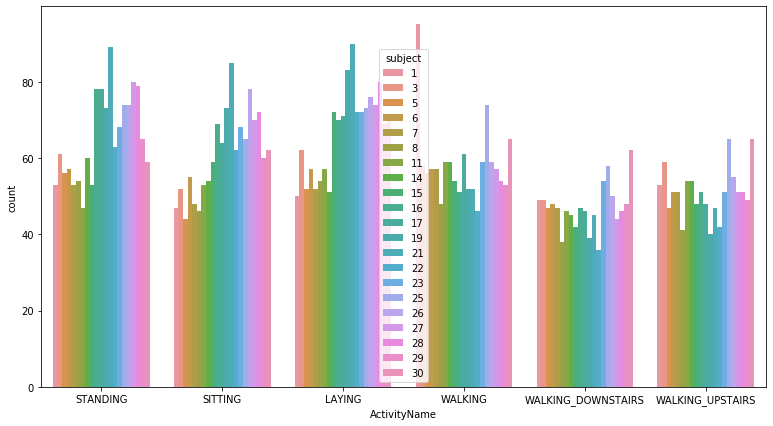

In [14]:
plt.figure(figsize=(13,7))
sns.countplot(x='ActivityName',data=train,hue='subject')

In [15]:
import chart_studio.plotly as py


In [16]:
from plotly import __version__

In [17]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

**Boxplot between activity and subject, showing there relation and impact**

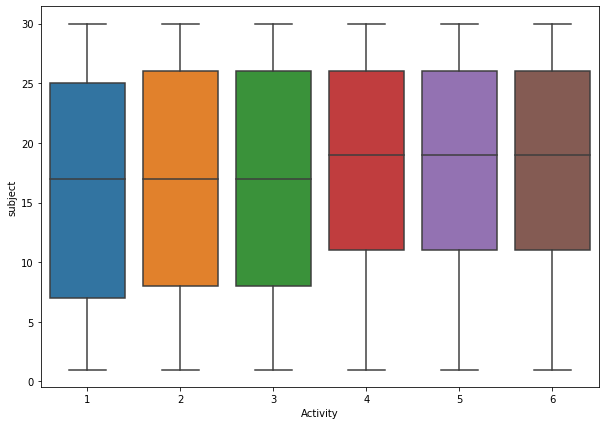

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='subject',data=train)

**Heatmap between Activity name vs subject with Activity as hue**

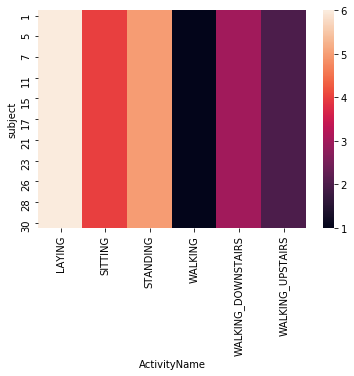

In [22]:
fp=train.pivot_table(index='subject',columns='ActivityName',values='Activity')
sns.heatmap(fp)

# 1. LOGISTIC REGRESSION

## Preparing the data

In [23]:
train.drop('ActivityName',axis=1,inplace=True)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=train.drop('Activity',axis=1)
y=train['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the algorithm

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel=LogisticRegression()

In [28]:
logmodel.fit(X_train,y_train)

/Users/garimagajendra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model has been trained now

## Predictions and Evaluations

In [29]:
predictions=logmodel.predict(X_test)

In [30]:
#evaluation model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
print(confusion_matrix(y_test,predictions))

[[384   1   1   0   0   0]
 [  2 332   0   0   0   0]
 [  0   1 297   0   0   0]
 [  0   0   0 363  18   0]
 [  0   0   0  29 380   0]
 [  0   1   0   0   0 397]]


In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       386
           2       0.99      0.99      0.99       334
           3       1.00      1.00      1.00       298
           4       0.93      0.95      0.94       381
           5       0.95      0.93      0.94       409
           6       1.00      1.00      1.00       398

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206



In [33]:
print(accuracy_score(y_test,predictions))

0.9759746146872167


**Logistic Regression gave us almost 97.5% precision**

# 2. K-NEAREST NEIGHBORS

## Training the algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn=KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [37]:
knn_predict=knn.predict(X_test)

## Predictions and Evaluations

In [38]:
print(confusion_matrix(y_test,knn_predict))

[[385   0   1   0   0   0]
 [  0 334   0   0   0   0]
 [  0   0 298   0   0   0]
 [  0   0   0 357  24   0]
 [  0   0   0  23 386   0]
 [  0   0   0   1   0 397]]


In [39]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       386
           2       1.00      1.00      1.00       334
           3       1.00      1.00      1.00       298
           4       0.94      0.94      0.94       381
           5       0.94      0.94      0.94       409
           6       1.00      1.00      1.00       398

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206



In [40]:
print(accuracy_score(y_test,knn_predict))

0.9777878513145966


 **KNN is providing us with the precision of 97.7%**

# 3. DECISION TREE AND RANDOM FOREST

## Training the algorithm

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree=DecisionTreeClassifier()

In [43]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluations

In [44]:
dtree_predict=dtree.predict(X_test)

In [45]:
print(confusion_matrix(y_test,dtree_predict))

[[363  16   7   0   0   0]
 [ 16 302  16   0   0   0]
 [ 10   6 282   0   0   0]
 [  0   0   0 349  32   0]
 [  0   0   0  26 383   0]
 [  0   0   0   0   0 398]]


In [46]:
print(classification_report(y_test,dtree_predict))

              precision    recall  f1-score   support

           1       0.93      0.94      0.94       386
           2       0.93      0.90      0.92       334
           3       0.92      0.95      0.94       298
           4       0.93      0.92      0.92       381
           5       0.92      0.94      0.93       409
           6       1.00      1.00      1.00       398

    accuracy                           0.94      2206
   macro avg       0.94      0.94      0.94      2206
weighted avg       0.94      0.94      0.94      2206



In [47]:
print(accuracy_score(y_test,dtree_predict))

0.9415231187669991


**Decision Tree is providing us with the precision of 94%, KNN and Logistic Regression is better than this. So will try random forest**

## Random Forest

## Training the algorithm

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc=RandomForestClassifier(n_estimators=100)

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluations

In [51]:
rfc_predict=rfc.predict(X_test)

In [52]:
print(confusion_matrix(y_test,rfc_predict))

[[378   3   5   0   0   0]
 [  1 329   4   0   0   0]
 [  0   1 297   0   0   0]
 [  0   0   0 369  12   0]
 [  0   0   0  14 395   0]
 [  0   0   0   0   0 398]]


In [53]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       386
           2       0.99      0.99      0.99       334
           3       0.97      1.00      0.98       298
           4       0.96      0.97      0.97       381
           5       0.97      0.97      0.97       409
           6       1.00      1.00      1.00       398

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206



In [54]:
print(accuracy_score(y_test,rfc_predict))

0.9818676337262012


**Random Forest is providing us with the precision of 98.1%**

# 4. Support Vector Machine

## Training the algorithm

In [55]:
from sklearn.svm import SVC

In [56]:
model=SVC()

In [57]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predictions and Evaluations

In [58]:
svm_predict=model.predict(X_test)

In [59]:
print(confusion_matrix(y_test,svm_predict))

[[383   1   2   0   0   0]
 [  3 329   2   0   0   0]
 [  0   8 290   0   0   0]
 [  0   0   0 312  63   6]
 [  0   0   0  46 363   0]
 [  0   0   0   0   0 398]]


In [60]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       386
           2       0.97      0.99      0.98       334
           3       0.99      0.97      0.98       298
           4       0.87      0.82      0.84       381
           5       0.85      0.89      0.87       409
           6       0.99      1.00      0.99       398

    accuracy                           0.94      2206
   macro avg       0.94      0.94      0.94      2206
weighted avg       0.94      0.94      0.94      2206



In [61]:
print(accuracy_score(y_test,svm_predict))

0.9406165004533091


**SVM is providing us with the precision of 94%, which is not good in comparison with other models**

Here, if we compare all the models, we can see that random forest is providing us with the highest precison, whereas, Logistic Regression and KNN is pretty near. Therefore, we will check the precision of the test data using Random Forest.

# TEST DATA

We will split the test data, as inp and out

In [62]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [63]:
test.drop('ActivityName',axis=1,inplace=True)

In [64]:
inp=test.drop('Activity',axis=1)
out=test['Activity']

### Using pre-trained Random Forest model, to classify test data

In [69]:
test_pred=rfc.predict(inp)

In [70]:
print(confusion_matrix(out,test_pred))

[[476  11   9   0   0   0]
 [ 29 436   6   0   0   0]
 [ 24  43 353   0   0   0]
 [  0   0   0 437  54   0]
 [  0   0   0  38 494   0]
 [  0   0   0   0   0 537]]


In [71]:
print(classification_report(out,test_pred))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       496
           2       0.89      0.93      0.91       471
           3       0.96      0.84      0.90       420
           4       0.92      0.89      0.90       491
           5       0.90      0.93      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [72]:
print(accuracy_score(out,test_pred))

0.9273837801153716


**Here we can see that precision is reduced down to 92%, therefore we will try other models.**

### Using pre-trained KNN model, to classify test data

In [73]:
test_pred=knn.predict(inp)

In [75]:
print(classification_report(out,test_pred))

              precision    recall  f1-score   support

           1       0.71      0.83      0.77       496
           2       0.83      0.68      0.75       471
           3       0.77      0.78      0.77       420
           4       0.76      0.65      0.70       491
           5       0.71      0.85      0.77       532
           6       1.00      0.94      0.97       537

    accuracy                           0.79      2947
   macro avg       0.80      0.79      0.79      2947
weighted avg       0.80      0.79      0.79      2947



In [76]:
print(accuracy_score(out,test_pred))

0.7909738717339667


**Here we can see that precision is reduced down to 79%, therefore we will use Logistic Regression.**

### Using pre-trained Logistic Regression model, to classify test data

In [77]:
test_pred=logmodel.predict(inp)

In [78]:
print(classification_report(out,test_pred))

              precision    recall  f1-score   support

           1       0.93      0.98      0.95       496
           2       0.95      0.93      0.94       471
           3       0.97      0.95      0.96       420
           4       0.95      0.85      0.90       491
           5       0.88      0.96      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.94      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [79]:
print(accuracy_score(out,test_pred))

0.9457074991516796


**Here we can see that precision is 95%**

## Conclusion: We can conclude that Logistic Regression us is the best suitable model as per the results provided by the "Test" data, giving us the highest precision of 95%, which is really good for a model.